In [1]:
import neutromeratio
import pickle
from neutromeratio.constants import kT
import pandas as pd
from simtk import unit
from neutromeratio.plotting import plot_correlation_analysis
import matplotlib.pyplot as plt
import numpy as np

_ColormakerRegistry()

[utils.py:141 - _init_num_threads()] NumExpr defaulting to 8 threads.


In [2]:
results = pickle.load(open('../data/results/combined_results_in_kT.pickle', 'rb'))
results.index

Index(['EXPERIMENT_solv', 'ANI1ccx_vacuum_global_minimum_dE',
       'ANI1ccx_vacuum_random_minimum_dE', 'ANI1ccx_vacuum_global_minimum_dG',
       'ANI1ccx_vacuum_random_minimum_dG', 'ANI1ccx_vacuum_mining_minima_dG',
       'ANI1ccx_vacuum_alchemical_dG', 'DFT_vac_global_minimum_dG',
       'DFT_solv_global_minimum_dG', 'DFT_vac_mining_minima_dG',
       'DFT_solv_mining_minima_dG'],
      dtype='object')

In [10]:
import torch
import numpy as np

In [2]:
a = torch.randn(1, 1)
sum(a) / len(a)

tensor([0.4217])

In [21]:
a = torch.Tensor([0.4283])
b = torch.Tensor([-1.2332])
c = torch.Tensor([-1.9793])
g = [a, b, c]
g

[tensor([0.4283]), tensor([-1.2332]), tensor([-1.9793])]

In [22]:
x = torch.cat(g)
torch.std(x, unbiased=False)

tensor(1.0063)

In [23]:
torch.mean(x)

tensor(-0.9281)

In [24]:
np.std([0.4283, -1.2332, -1.9793])

1.0063015463677984

In [25]:
np.average([0.4283, -1.2332, -1.9793])

-0.9280666666666667

In [14]:
np.std([0.4448, 0.2793, 1.2961])

0.4454690636471479

In [ ]:
np.stddev(x)

In [18]:
torch.mean(a)

tensor(-0.4682)

In [22]:
outputs = [x.double() for x in a]
print(outputs)
print(sum(outputs) / len(outputs))

[tensor([ 0.2990, -1.2803,  0.7049, -1.5963], dtype=torch.float64)]
tensor([ 0.2990, -1.2803,  0.7049, -1.5963], dtype=torch.float64)


In [7]:
a = torch.randn(1, 4)
torch.std(a)

tensor(1.7137)

In [10]:
outputs = [x.double() for x in a]
print(outputs)

[tensor([ 0.4041,  0.0137, -0.3369, -3.3465], dtype=torch.float64)]


In [14]:
torch.std(outputs[0])

tensor(1.7137, dtype=torch.float64)

In [15]:
torch.sum(a)

tensor(-3.2656)

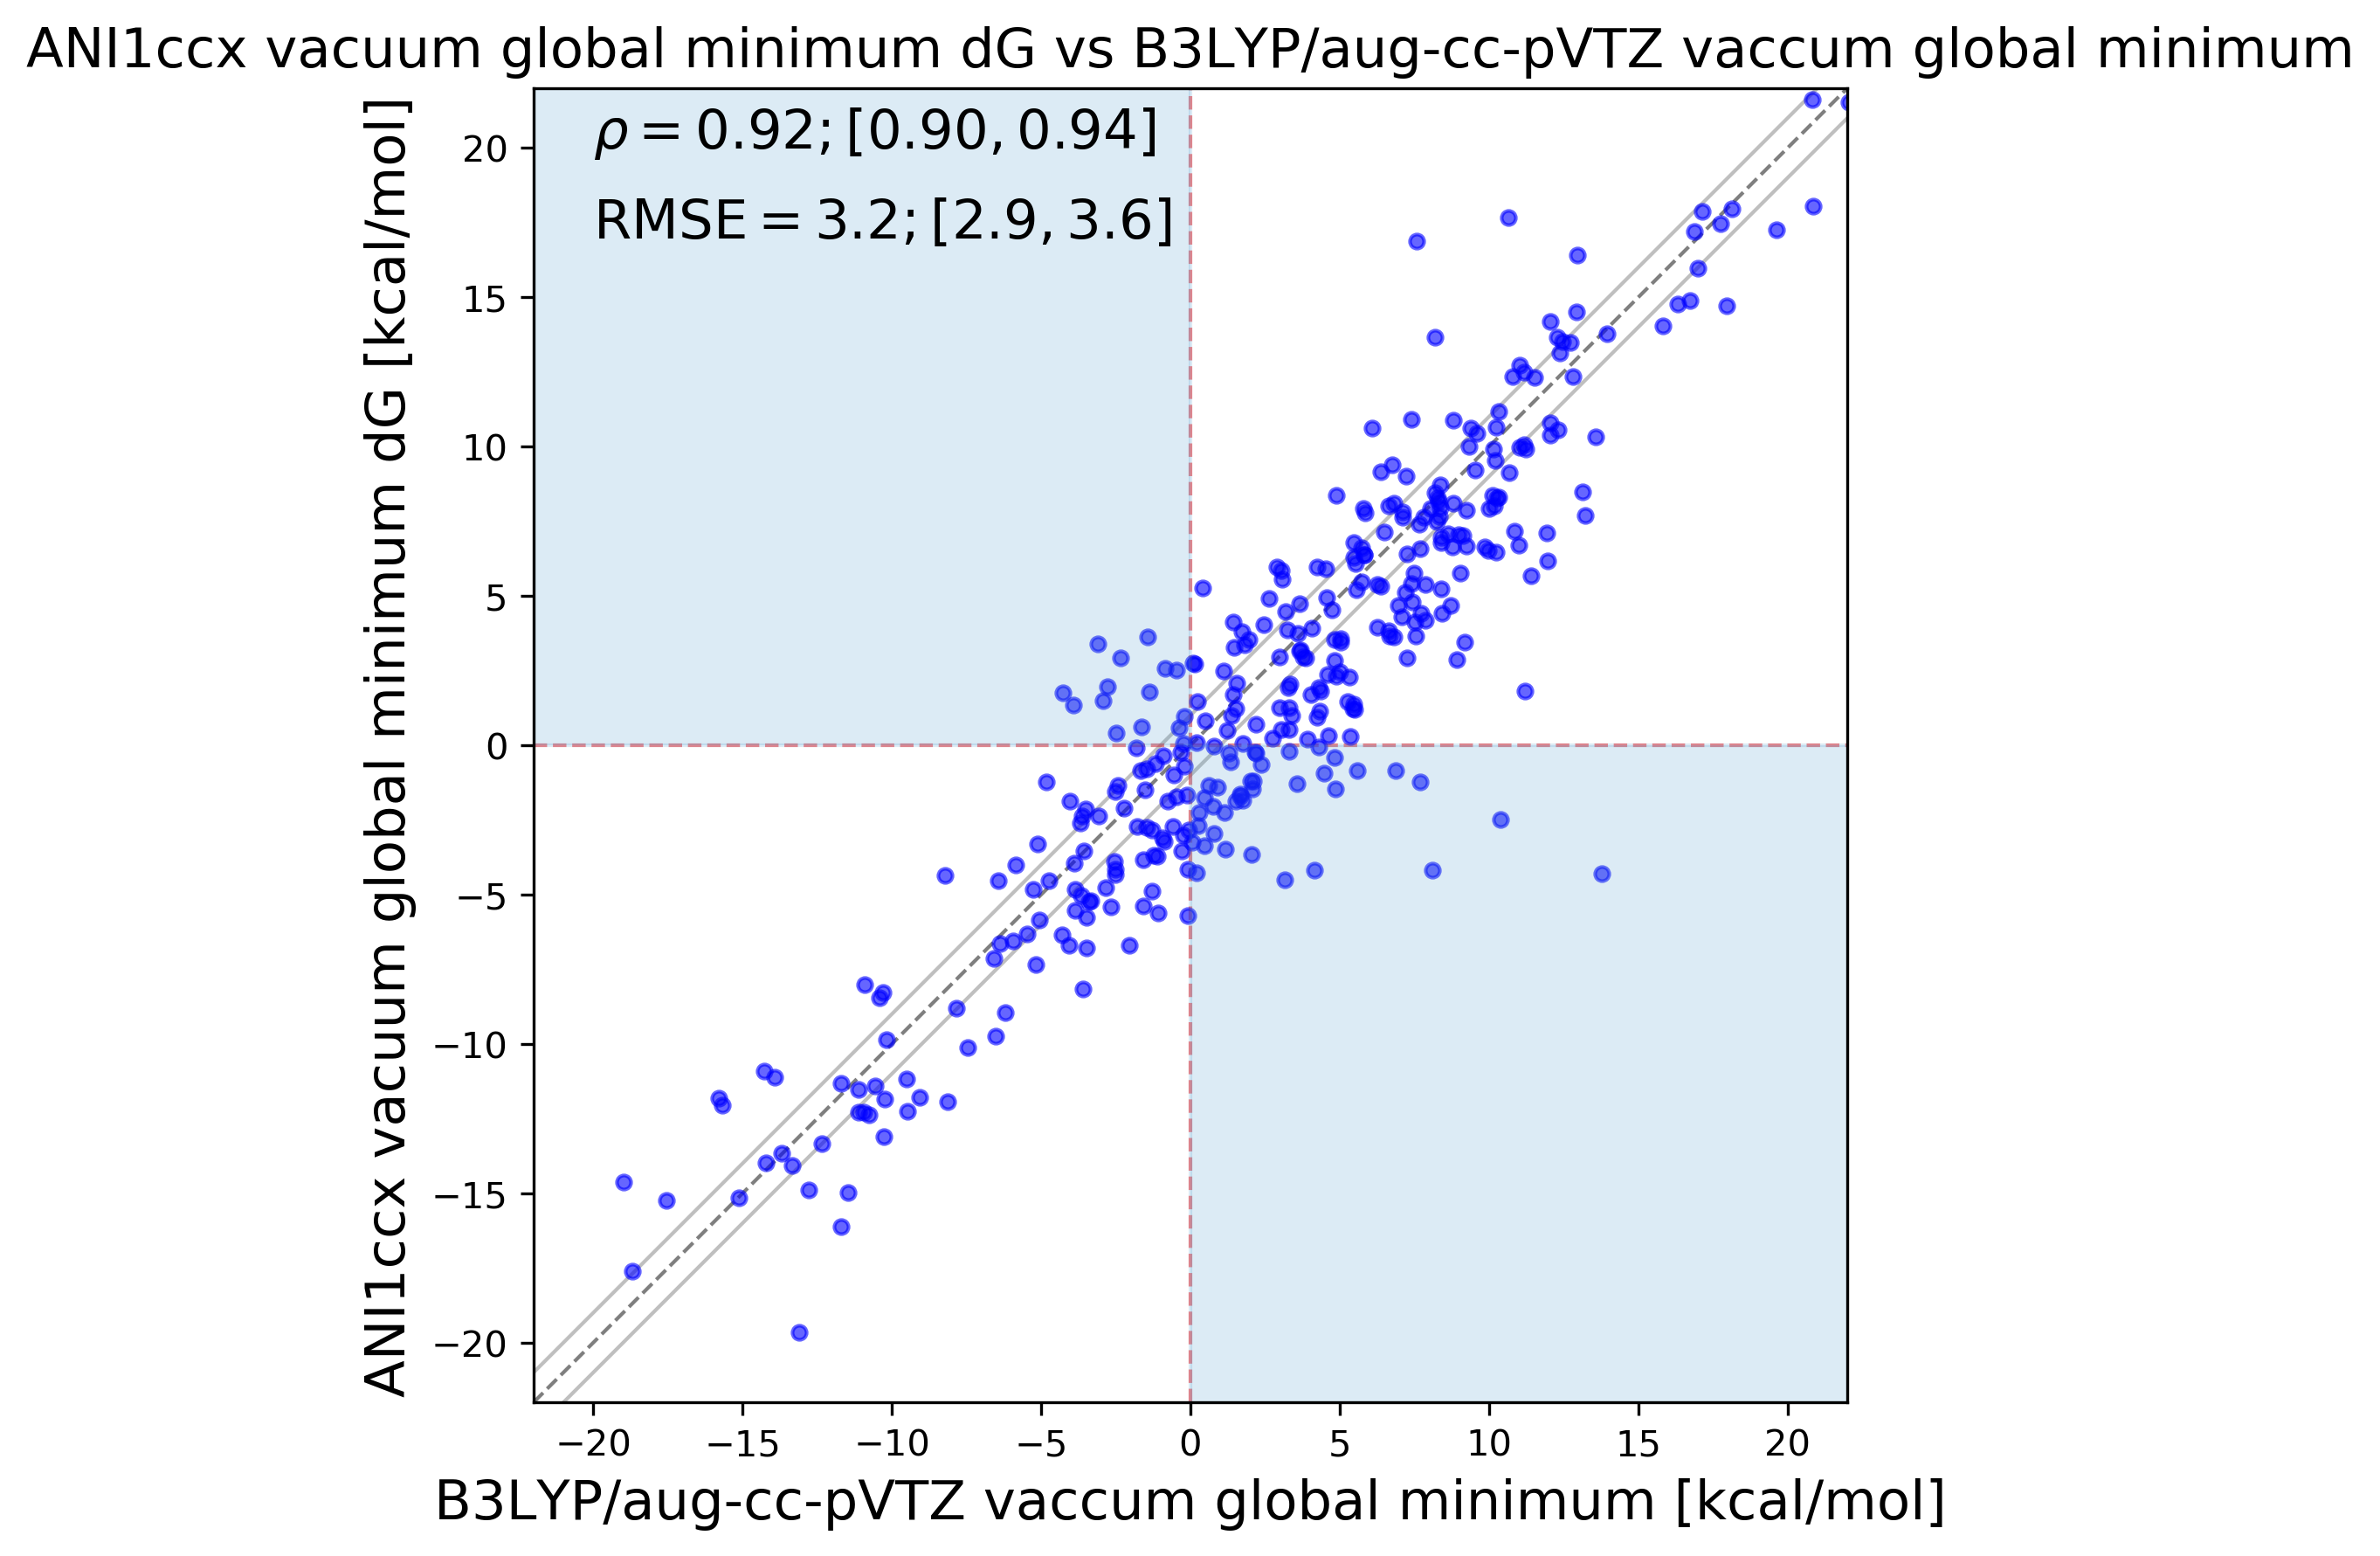

In [15]:
x_list = []
y_list = []

for a in list(results.loc['ANI1ccx_vacuum_global_minimum_dG']):
    a = a *kT
    a = a.value_in_unit(unit.kilocalorie_per_mole)
    x_list.append(a)
    
for a in list(results.loc['DFT_vac_global_minimum_dG']):
    a = a *kT
    a = a.value_in_unit(unit.kilocalorie_per_mole)
    y_list.append(a)

absolute_error = []
for i in range(len(x_list)):
    absolute_error.append(abs(y_list[i] - x_list[i]))
    
    
df = pd.DataFrame(list(zip(list(results.columns), x_list, y_list)), columns =['names', 'x', 'y']) 
df = df.dropna(axis=0)

f = plot_correlation_analysis(df, 'ANI1ccx vacuum global minimum dG vs B3LYP/aug-cc-pVTZ vaccum global minimum', 'ANI1ccx vacuum global minimum dG [kcal/mol]', 'B3LYP/aug-cc-pVTZ vaccum global minimum [kcal/mol]', 'g', 'o')
f.savefig('/home/mwieder/fig.png')

In [ ]:
names_in_all_testsets = []

In [ ]:
import seaborn as sb

absolute_error = []
x_list = []
y_list = []
for a in list(df.x):
    x_list.append(a)
    
for a in list(df.y):
    y_list.append(a)

absolute_error = []
for i in range(len(x_list)):
    absolute_error.append(abs(y_list[i] - x_list[i]))


sb.kdeplot(absolute_error)
plt.title('Absolute error between alchemical and mining minma free energy', size=20)
plt.xlabel('Absolute error in kcal/mol', size=20)

In [ ]:
from_worst_to_best = []
names = list(df.names)
for i in reversed(np.argsort(absolute_error)):
    from_worst_to_best.append(i)
from rdkit.Chem import AllChem
mols = []
legends = []
for i in range(0, 20):
    idx = from_worst_to_best[i]
    exp_results = pickle.load(open('../data/exp_results.pickle', 'rb'))
    name = names[idx]
    names_in_all_testsets.append(name)
    t1_smiles = exp_results[name]['t1-smiles']
    t2_smiles = exp_results[name]['t2-smiles']
    m1 = neutromeratio.generate_rdkit_mol(t1_smiles)
    AllChem.Compute2DCoords(m1)
    m2 = neutromeratio.generate_rdkit_mol(t2_smiles)
    AllChem.Compute2DCoords(m2)
    mols.append(m1)
    legends.append(f"{name}-t1-{np.round(absolute_error[idx], 2)}")
    mols.append(m2)
    legends.append(f"{name}-t2-{np.round(absolute_error[idx], 2)}")
from rdkit.Chem import Draw
img=Draw.MolsToGridImage(mols, molsPerRow=4, legends=legends)
img

In [ ]:
x_list = []
y_list = []

for a in list(results.loc['ANI1ccx_vacuum_alchemical_dG']):
    a = a *kT
    a = a.value_in_unit(unit.kilocalorie_per_mole)
    x_list.append(a)
    
for a in list(results.loc['ANI1ccx_vacuum_mining_minima_dG']):
    a = a *kT
    a = a.value_in_unit(unit.kilocalorie_per_mole)
    y_list.append(a)

absolute_error = []
for i in range(len(x_list)):
    absolute_error.append(abs(y_list[i] - x_list[i]))
    
    
df = pd.DataFrame(list(zip(list(results.columns), x_list, y_list)), columns =['names', 'x', 'y']) 
df = df.dropna(axis=0)

f = plot_correlation_analysis(df, 'ANI1ccx alchemical dG vs IG-RRHO/B3LYP/aug-cc-pVTZ mining minimum', 'ANI1ccx alchemical dG [kcal/mol] in vacuum', 'DFT dG mining minimum [kcal/mol] in vacuum', 'g', 'o')
f.savefig('/home/mwieder/fig.png')

In [ ]:
import seaborn as sb

absolute_error = []
x_list = []
y_list = []
for a in list(df.x):
    x_list.append(a)
    
for a in list(df.y):
    y_list.append(a)

absolute_error = []
for i in range(len(x_list)):
    absolute_error.append(abs(y_list[i] - x_list[i]))


sb.kdeplot(absolute_error)
plt.title('Absolute error between alchemical and mining minma free energy', size=20)
plt.xlabel('Absolute error in kcal/mol', size=20)

In [ ]:
from_worst_to_best = []
names = list(df.names)
for i in reversed(np.argsort(absolute_error)):
    from_worst_to_best.append(i)
from rdkit.Chem import AllChem
mols = []
legends = []
for i in range(0, 20):
    idx = from_worst_to_best[i]
    exp_results = pickle.load(open('../data/exp_results.pickle', 'rb'))
    name = names[idx]
    names_in_all_testsets.append(name)
    t1_smiles = exp_results[name]['t1-smiles']
    t2_smiles = exp_results[name]['t2-smiles']
    m1 = neutromeratio.generate_rdkit_mol(t1_smiles)
    AllChem.Compute2DCoords(m1)
    m2 = neutromeratio.generate_rdkit_mol(t2_smiles)
    AllChem.Compute2DCoords(m2)
    mols.append(m1)
    legends.append(f"{name}-t1-{np.round(absolute_error[idx], 2)}")
    mols.append(m2)
    legends.append(f"{name}-t2-{np.round(absolute_error[idx], 2)}")
from rdkit.Chem import Draw
img=Draw.MolsToGridImage(mols, molsPerRow=4, legends=legends)
img

In [ ]:
x_list = []
y_list = []

for a in list(results.loc['EXPERIMENT_solv']):
    a = a *kT
    a = a.value_in_unit(unit.kilocalorie_per_mole)
    x_list.append(a)
    
for a in list(results.loc['DFT_solv_mining_minima_dG']):
    a = a *kT
    a = a.value_in_unit(unit.kilocalorie_per_mole)
    y_list.append(a)

absolute_error = []
for i in range(len(x_list)):
    absolute_error.append(abs(y_list[i] - x_list[i]))
    
    
df = pd.DataFrame(list(zip(list(results.columns), x_list, y_list)), columns =['names', 'x', 'y']) 
df = df.dropna(axis=0)

f = plot_correlation_analysis(df, 'ANI1ccx alchemical dG vs IG-RRHO/B3LYP/aug-cc-pVTZ mining minimum', 'ANI1ccx alchemical dG [kcal/mol] in vacuum', 'DFT dG mining minimum [kcal/mol] in vacuum', 'g', 'o')
f.savefig('/home/mwieder/fig.png')

In [ ]:
import seaborn as sb

absolute_error = []
x_list = []
y_list = []
for a in list(df.x):
    x_list.append(a)
    
for a in list(df.y):
    y_list.append(a)

absolute_error = []
for i in range(len(x_list)):
    absolute_error.append(abs(y_list[i] - x_list[i]))


sb.kdeplot(absolute_error)
plt.title('Absolute error between DFT and experimental free energy', size=20)
plt.xlabel('Absolute error in kcal/mol', size=20)

In [ ]:
from_worst_to_best = []
names = list(df.names)
for i in reversed(np.argsort(absolute_error)):
    from_worst_to_best.append(i)
from rdkit.Chem import AllChem
mols = []
legends = []
for i in range(0, 20):
    idx = from_worst_to_best[i]
    exp_results = pickle.load(open('../data/exp_results.pickle', 'rb'))
    name = names[idx]
    names_in_all_testsets.append(name)
    t1_smiles = exp_results[name]['t1-smiles']
    t2_smiles = exp_results[name]['t2-smiles']
    m1 = neutromeratio.generate_rdkit_mol(t1_smiles)
    AllChem.Compute2DCoords(m1)
    m2 = neutromeratio.generate_rdkit_mol(t2_smiles)
    AllChem.Compute2DCoords(m2)
    mols.append(m1)
    legends.append(f"{name}-t1-{np.round(absolute_error[idx], 2)}")
    mols.append(m2)
    legends.append(f"{name}-t2-{np.round(absolute_error[idx], 2)}")
from rdkit.Chem import Draw
img=Draw.MolsToGridImage(mols, molsPerRow=4, legends=legends)
img

In [ ]:
from collections import Counter
c = Counter(names_in_all_testsets)

In [ ]:
mols = []
legends = []
for name in names_in_all_testsets:
    if c[name] > 2:
        t1_smiles = exp_results[name]['t1-smiles']
        t2_smiles = exp_results[name]['t2-smiles']
        m1 = neutromeratio.generate_rdkit_mol(t1_smiles)
        AllChem.Compute2DCoords(m1)
        m2 = neutromeratio.generate_rdkit_mol(t2_smiles)
        AllChem.Compute2DCoords(m2)
        mols.append(m1)
        legends.append(f"{name}-t1")
        mols.append(m2)
        legends.append(f"{name}-t2")
from rdkit.Chem import Draw
img=Draw.MolsToGridImage(mols, molsPerRow=4, legends=legends)
img

In [ ]:
counter['molDWRow_1672']

In [ ]:
x_list = []
y_list = []

for a in list(results['experimental_values [kT]']):
    a = a *kT
    a = a.value_in_unit(unit.kilocalorie_per_mole)
    x_list.append(a)
    
for a in list(results['free energy difference in vacuum using the Mining Minima approach with ANI1-ccx [kT]']):
    a = a *kT
    a = a.value_in_unit(unit.kilocalorie_per_mole)
    y_list.append(a)

df = pd.DataFrame(list(zip(list(results.names), x_list, y_list, ['ANI1ccx']*len(results.names))), columns =['names', 'x', 'y', 'method']) 
f = plot_correlation_analysis(df, 'dG vs dE', 'experimental value [kcal/mol]', 'dG mining minima [kcal/mol]', 'g', 'o')


In [ ]:
x_list = []
y_list = []

for a in list(results['free energy difference in vacuum with B3LYP/aug-cc-pVTZ (difference between minimum conformations) [kT]']):
    a = a *kT
    a = a.value_in_unit(unit.kilocalorie_per_mole)
    x_list.append(a)
    
for a in list(results['free energy difference in vacuum using the Mining Minima approach with ANI1-ccx [kT]']):
    a = a *kT
    a = a.value_in_unit(unit.kilocalorie_per_mole)
    y_list.append(a)

df = pd.DataFrame(list(zip(list(results.names), x_list, y_list, ['ANI1ccx']*len(results.names))), columns =['names', 'x', 'y', 'method']) 
f = plot_correlation_analysis(df, 'dG vs dE', 'experimental value [kcal/mol]', 'dG mining minima [kcal/mol]', 'g', 'o')


In [ ]:
results = pickle.load(open('../data/exp_results.pickle', 'rb'))
for name in results:
    print(name)
    print(results[name])
    if results[name]['name'] == 'molDWRowNr107':
        print(name)
        print(results[name])

In [ ]:
import neutromeratio
from openmmtools.constants import kB
from simtk import unit
import numpy as np
import pickle
import mdtraj as md
import torchani
import torch
from tqdm import tqdm
import matplotlib.pyplot as plt
import random
from neutromeratio.vis import generate_nglview_object

exp_results = pickle.load(open('../data/exp_results.pickle', 'rb'))

# name of the system
name = str(sys.argv[1])

from_mol_tautomer_idx = 1
to_mol_tautomer_idx = 2

t1_smiles = exp_results[name]['t1-smiles']
t2_smiles = exp_results[name]['t2-smiles']

# generate both rdkit molhttp://localhost:8888/notebooks/notebooks/testing-hybrid-structures.ipynb#
tautomer = neutromeratio.Tautomer(name=name, intial_state_mol=neutromeratio.generate_rdkit_mol(t1_smiles), final_state_mol=neutromeratio.generate_rdkit_mol(t2_smiles), nr_of_conformations=20)
tautomer.perform_tautomer_transformation_forward()


lambda_value = 0.0
mode = 'forward'
topology = tautomer.ligand_in_water_topology
ani_traj = md.load()
v = neutromeratio.generate_nglview_object(ani_traj, 18)
v

In [8]:
import mdtraj as md
import neutromeratio
import nglview
p = md.load('/home/mwieder/m1.pdb')
v = nglview.show_mdtraj(p)
v

NGLWidget()